## JSPMS Jayawantrao Sawant College of Engineering Hadapsar
## Mechanical Engineering Department
## Data Analytics Lab
## Experiment No       : 05
## Date of Conduction  : 23 Aug 2023
## Name of Faculty     : Prof. Mahesh Shinde
## Name of Student     : Ganesh Anjaram Tekale
## Rol No              : 4261
## Name of Experiment  :To develop Manufacturing Cost Model

# **Step 1 Define Libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  #visualization
import matplotlib.pyplot as plt

# **Step 2 Data Loading**

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Data Expt 5 Manufacturing Cost.xlsx to Data Expt 5 Manufacturing Cost.xlsx


# **Step3 Check Dataset**

In [3]:
data=pd.read_excel("Data Expt 5 Manufacturing Cost.xlsx")

In [4]:
data.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [5]:
data.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [6]:
nans=pd.isnull(data).sum()
nans[nans>0]

Series([], dtype: int64)

In [7]:
data.shape[0]

1000

# **Step 4 Data Visualization**

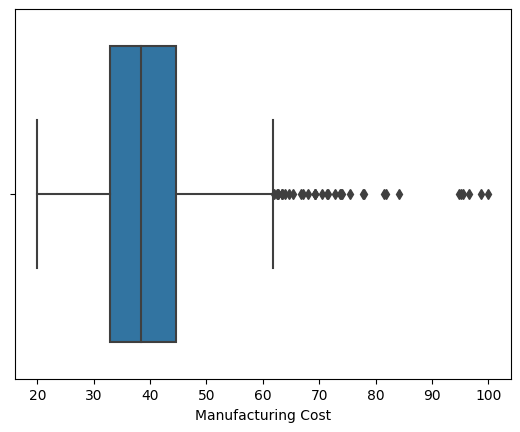

In [8]:
ax = sns.boxplot(x=data["Manufacturing Cost"])

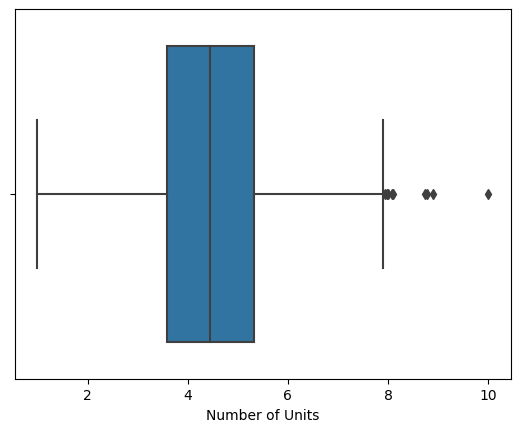

In [9]:
ax = sns.boxplot(x=data['Number of Units'])

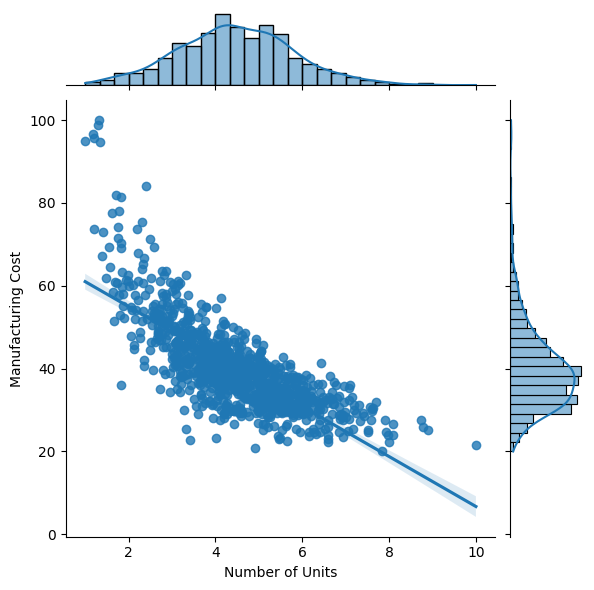

In [10]:
sns.jointplot(data=data, x="Number of Units", y="Manufacturing Cost", kind="reg")

# **Step 5 build model**

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
scaled_data = sc.fit_transform(data)
scaled_data

array([[0.        , 0.9383257 ],
       [0.02066596, 0.95664687],
       [0.02127763, 0.67076638],
       ...,
       [0.86454312, 0.07467234],
       [0.87752219, 0.06422889],
       [1.        , 0.01934721]])

In [12]:
scaled_data = pd.DataFrame(scaled_data, columns = ['Number of Units', 'Manufacturing Cost'])

In [13]:
scaled_data

,Number of Units,Manufacturing Cost
0,0.000000,0.938326
1,0.020666,0.956647
2,0.021278,0.670766
3,0.022752,0.944586
4,0.033197,0.984713
...,...,...
995,0.788857,0.048188
996,0.859972,0.094207
997,0.864543,0.074672
998,0.877522,0.064229


In [14]:
y = scaled_data.pop('Manufacturing Cost')
y

0      0.938326
1      0.956647
2      0.670766
3      0.944586
4      0.984713
         ...   
995    0.048188
996    0.094207
997    0.074672
998    0.064229
999    0.019347
Name: Manufacturing Cost, Length: 1000, dtype: float64

In [15]:
X = scaled_data.values

In [16]:
from sklearn.model_selection import train_test_split
seed=1
X_train, X_test, \
y_train, y_test = train_test_split(X, y, test_size=0.2, \
                                   random_state=42)

In [17]:
from sklearn.svm import SVR

In [18]:
regr= SVR(C=1.0, epsilon=0.2)
regr.fit(X_train,y_train.ravel())

SVR(epsilon=0.2)

In [19]:
y_pred = regr.predict(X_test)
y_pred

array([0.23476998, 0.19564829, 0.19552012, 0.20350118, 0.25761209,
       0.20152073, 0.20868388, 0.23718671, 0.20304453, 0.35180452,
       0.19570875, 0.41292374, 0.20709024, 0.23183355, 0.22813452,
       0.21300845, 0.28898906, 0.20898637, 0.19462914, 0.27781544,
       0.22914077, 0.33378322, 0.26540822, 0.23374456, 0.317575  ,
       0.30691577, 0.38566758, 0.22948237, 0.21358697, 0.22992041,
       0.27087766, 0.35108264, 0.20962335, 0.24059563, 0.26569672,
       0.32181694, 0.20065724, 0.22099506, 0.21344844, 0.45573471,
       0.27529935, 0.38878804, 0.27968523, 0.23177926, 0.28450419,
       0.29023651, 0.22285173, 0.2161231 , 0.25313191, 0.19790806,
       0.2250116 , 0.20793397, 0.29438255, 0.22256105, 0.60464413,
       0.58535064, 0.21132973, 0.70114225, 0.31394558, 0.19646868,
       0.28550935, 0.46230228, 0.23054964, 0.3178442 , 0.21526703,
       0.20025726, 0.20334417, 0.2047899 , 0.41879638, 0.23031656,
       0.37798776, 0.24097249, 0.22005137, 0.19537004, 0.28626

In [20]:
from sklearn.metrics import r2_score,mean_squared_error

In [21]:
mse = mean_squared_error(y_test,y_pred)
rmse= np.sqrt(mse)
rmse

0.0822903295452384

In [22]:
mse

0.006771698336663936

In [23]:
r2_score(y_test, y_pred)

0.4700318323625766

# **The R-square value is approximately 0.5 which is quite encouraging. We can improve this work by trying out algorithms as well.**